Picked a random target: Vascular endothelial growth factor receptor 1

On Chembl found all associated compounds and downloaded their info as csv file.

In [28]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)
from rdkit.Chem import rdMolDescriptors as rdescriptors
import seaborn as sns

In [ ]:
df = pd.read_csv("/Users/emafialova/cdd2025/data/chembl_mtor_ic50.csv", sep=";")
df_smiles = df["Smiles"]
df_smiles.head()

0    CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...
1       CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1
2      COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1
3    CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...
4    CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...
Name: Smiles, dtype: object

In [14]:
drugbank = [mol for mol in Chem.SDMolSupplier("/Users/emafialova/cdd2025/data/drugbank.sdf") if mol]

In [19]:
df_smiles_list = list(Chem.MolFromSmiles(smiles) for smiles in df_smiles)

In [20]:
df_mw = [rdescriptors.CalcExactMolWt(mol) for mol in df_smiles_list]
drugbank_mw = [rdescriptors.CalcExactMolWt(mol) for mol in drugbank]

<Axes: >

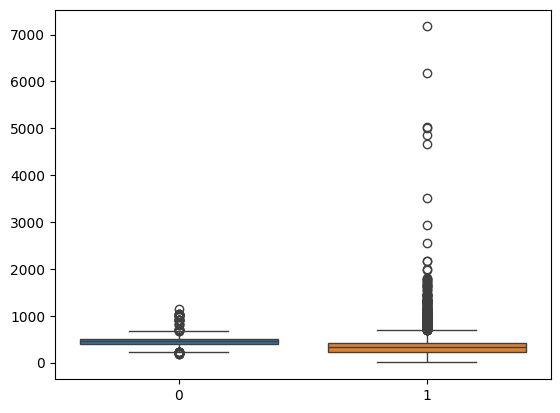

In [26]:
sns.boxplot([df_mw, drugbank_mw])

In [36]:
from rdkit.Chem import Lipinski
df_HAA = [Lipinski.NumHAcceptors(mol) for mol in df_smiles_list]
db_HAA = [Chem.Lipinski.NumHAcceptors(mol) for mol in drugbank]

In [37]:
df_HAD = [Lipinski.NumHDonors(mol) for mol in df_smiles_list]
db_HAD = [Chem.Lipinski.NumHDonors(mol) for mol in drugbank]

In [38]:
from rdkit.Chem import Crippen
df_logP = [Chem.Crippen.MolLogP(mol) for mol in df_smiles_list]
db_logP = [Chem.Crippen.MolLogP(mol) for mol in drugbank]

<Axes: >

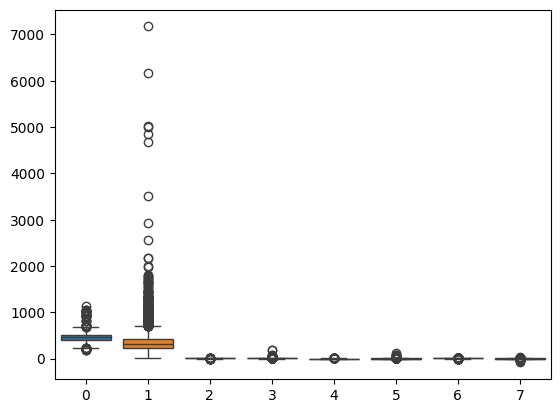

In [39]:
sns.boxplot([df_mw, drugbank_mw, df_HAA, db_HAA, df_HAD, db_HAD, df_logP, db_logP])

I cant see anything properly so for the next step, lets get rid of the MW values

<Axes: >

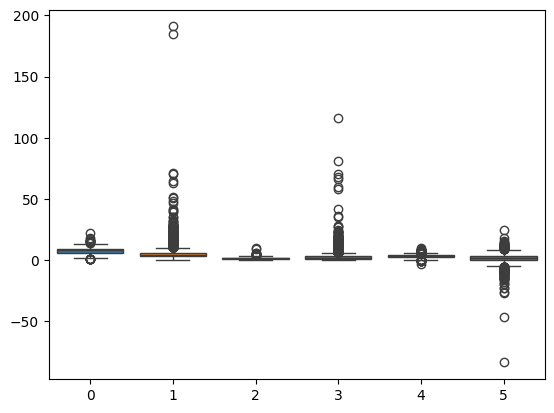

In [40]:
sns.boxplot([df_HAA, db_HAA, df_HAD, db_HAD, df_logP, db_logP])

Still nit visible, lets get rid of the outliers

/var/folders/vs/jvlkzzgs5qng_qg2lf5q2zwr0000gn/T/ipykernel_6630/1076373298.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot([df_HAA, db_HAA, df_HAD, db_HAD, df_logP, db_logP], showfliers = False).set(xticklabels = ["df_HAA", "db_HAA", "df_HAD", "db_HAD", "df_logP", "db_logP"])


[[Text(0, 0, 'df_HAA'),
  Text(1, 0, 'db_HAA'),
  Text(2, 0, 'df_HAD'),
  Text(3, 0, 'db_HAD'),
  Text(4, 0, 'df_logP'),
  Text(5, 0, 'db_logP')]]

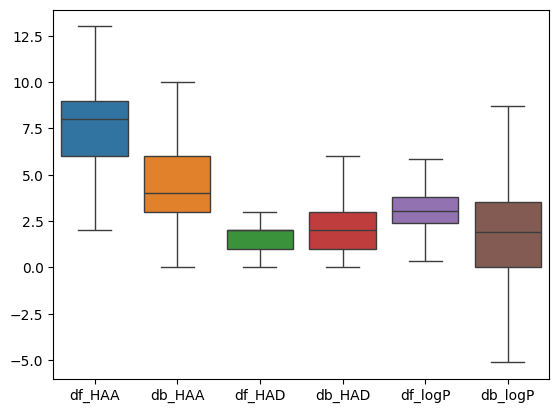

In [44]:
sns.boxplot([df_HAA, db_HAA, df_HAD, db_HAD, df_logP, db_logP], showfliers = False).set(xticklabels = ["df_HAA", "db_HAA", "df_HAD", "db_HAD", "df_logP", "db_logP"])

We have a reason to believe that there is correlation between logP values and molecular weight, we want to test our hypothesis by plotting them in a scatter plot against each other:

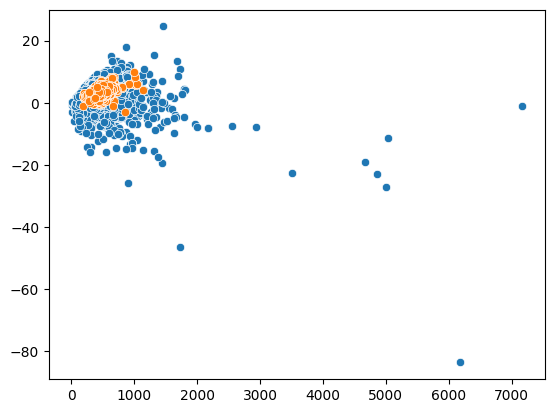

In [48]:
import matplotlib.pyplot as plt
sns.scatterplot(x=drugbank_mw, y=db_logP)
sns.scatterplot(x=df_mw, y=df_logP)
plt.show()